# CV Project: Deep Learning for Camera Pose Estimation: A Comparative Study on 7-Scenes (beta=250.0)

In [1]:
# demo.ipynb

import os
import argparse
import pandas as pd
import matplotlib.pyplot as plt

from train import train
from eval import evaluate
from geometry_baseline import run_baseline

DATA_ROOT = "/Users/zhengbinheng/Desktop/7-scenes-dataset"  
OUT_DIR = "runs/posenet_chess"
CKPT_PATH = os.path.join(OUT_DIR, "best.ckpt")
RESULTS_DIR = "results"
os.makedirs(RESULTS_DIR, exist_ok=True)


In [2]:
args = argparse.Namespace(
    data_root=DATA_ROOT,
    scene="chess",
    epochs=30,
    batch_size=32,
    lr=1e-4,
    beta=250.0,
    out=OUT_DIR
)
train(args)  # best.ckpt + loss


/opt/anaconda3/envs/node2/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[1/30] avg_loss = 58.4096
[2/30] avg_loss = 13.4490
[3/30] avg_loss = 10.6508
[4/30] avg_loss = 9.1371
[5/30] avg_loss = 7.3342
[6/30] avg_loss = 6.5170
[7/30] avg_loss = 6.0669
[8/30] avg_loss = 5.4944
[9/30] avg_loss = 5.1413
[10/30] avg_loss = 4.6736
[11/30] avg_loss = 4.6578
[12/30] avg_loss = 4.3874
[13/30] avg_loss = 4.1073
[14/30] avg_loss = 3.9061
[15/30] avg_loss = 3.9593
[16/30] avg_loss = 3.6539
[17/30] avg_loss = 3.5090
[18/30] avg_loss = 3.5491
[19/30] avg_loss = 3.2542
[20/30] avg_loss = 3.1432
[21/30] avg_loss = 3.4877
[22/30] avg_loss = 3.2562
[23/30] avg_loss = 3.3816
[24/30] avg_loss = 3.0714
[25/30] avg_loss = 2.9598
[26/30] avg_loss = 2.8245
[27/30] avg_loss = 2.9810
[28/30] avg_loss = 2.9205
[29/30] avg_loss = 2.8666
[30/30] avg_loss = 2.6959
Training finished. Best loss = 2.6959
Results saved in runs/posenet_chess


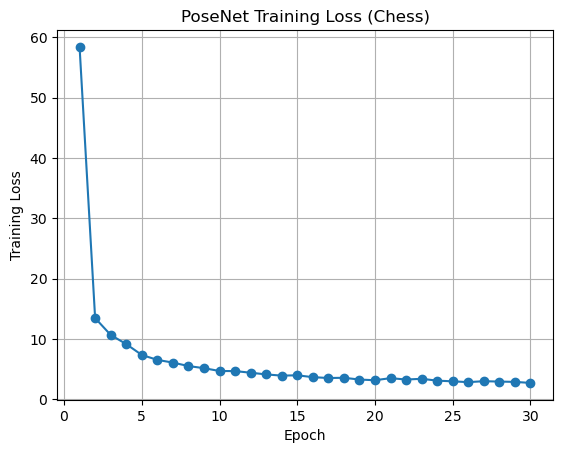

In [3]:
df_loss = pd.read_csv(os.path.join(OUT_DIR, "loss_curve.csv"))
plt.plot(df_loss["epoch"], df_loss["loss"], marker="o")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("PoseNet Training Loss (Chess)")
plt.grid(True)
plt.show()


In [4]:
def run_eval(scene):
    args = argparse.Namespace(
        data_root=DATA_ROOT,
        scene=scene,
        ckpt=CKPT_PATH,
        out=os.path.join(RESULTS_DIR, f"{scene}_posenet.csv")
    )
    stats, df = evaluate(args)
    return stats, df

scenes = ["chess", "fire", "heads"]

pose_stats, pose_perframe = {}, {}
for s in scenes:
    stats, df = run_eval(s)
    pose_stats[s] = stats
    pose_perframe[s] = df


[PoseNet | chess] mean_t=0.196 m | median_t=0.148 m || mean_r=5.41° | median_r=4.75°
[PoseNet | fire] mean_t=0.981 m | median_t=0.957 m || mean_r=40.74° | median_r=36.28°
[PoseNet | heads] mean_t=0.816 m | median_t=0.775 m || mean_r=47.73° | median_r=46.40°


In [5]:
summary = pd.DataFrame([
    {
        "Scene": s,
        "PoseNet mean_t (m)": pose_stats[s]["mean_t"],
        "PoseNet median_t (m)": pose_stats[s]["median_t"],
        "PoseNet mean_r (°)": pose_stats[s]["mean_r"],
        "PoseNet median_r (°)": pose_stats[s]["median_r"],
    }
    for s in scenes
])

summary.round(3)


,Scene,PoseNet mean_t (m),PoseNet median_t (m),PoseNet mean_r (°),PoseNet median_r (°)
0,chess,0.196,0.148,5.408,4.753
1,fire,0.981,0.957,40.742,36.282
2,heads,0.816,0.775,47.732,46.400
